In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
    'width': 1920,
    'height': 1080,
    'scroll': True,
})

{'width': 1920, 'height': 1080, 'scroll': True}

# Lab 6. Dark Matter!

## Wednesday, October 27, 7-10 PM

#### Jingyao Zhu <jingyao.zhu@columbia.edu>

In this lab, we examine astronomical evidence for dark matter!

What do you see in this figure? (Hubble Space Telescope, deep field)

<img src="./Hubble_deep_field.jpg" width="500">

The matter we see in the sky, e.g., stars, galaxies, gas and dust, are considered 'normal' or luminous matter, because they emit, absorb, or scatter light that are eventually received by our eyes (or telescopes). Dark matter is called $\textbf{dark}$ because they do not interact with light as the luminous matter does. However, they do interact with other matter via the force of $\textbf{gravity}$. 

In this lab, we will look at two cases of material motions under gravity, first one is in the solar neighborhood to get you familiar with rotational dynamics, the second one is closely linked to the discovery of dark matter!

Try to convince yourself by the end of the lab: does your data speak in favor of the existence of dark matter?

## Solar System: Circular Orbits Under Gravity


Orbits in the solar system: 
1. Near circular; 2. Different rotational velocities: "$\textit{differential}$" rotation

<img src="./solar_system_orbits.gif" width="500">

### 2.1 Velocity Expression?

Force balance: centripetal = gravity

\begin{equation}
F = \frac{G M_{Planet} M_{\odot}}{r^{2}} = \frac{M_{Planet} v^{2}}{r}
\end{equation}
which gives the rotational velocity equation (assuming circular)
\begin{equation}
v = \sqrt{\frac{G M_{\odot}}{r}}
\end{equation}

### 2.2 Planet Rotational Velocities

\begin{equation}
v = \sqrt{\frac{G M_{\odot}}{r}},
\end{equation}

where $M_{\odot} = 1.989 \times 10^{33} g$ and $G = 4.31 \times 10^{-6} km^{2} s^{-2} kpc \cdot M_{\odot}^{-1} = 4.46 \times 10^{-21} cm^{2} s^{-2} AU g^{-1}$ are constants. Given $r$ [AU], calculate $v$ [km/s], that would be the calculated orbital velocities. 

#### Caution: unit conversion!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u

names  = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
a_semi = np.array([0.3870993, 0.723336, 1.000003, 1.52371, 5.2029, 9.537, 19.189, 30.0699]) # AU
period = np.array([0.2408467, 0.61519726, 1.0000174, 1.8808158, 11.862615, 29.447498, 84.016846, 164.79132]) # yr
v_aver = np.array([47.915, 35.0435, 29.8061, 24.1456, 13.073, 9.65161, 6.80864, 5.43715]) # km/s

kpc_over_au = 1./4.84814e-9
vrot = np.sqrt(4.31e-6 * kpc_over_au / a_semi)
vrot_altG = np.sqrt(4.46e-21 * 1.989e33/a_semi)/1.e5

print (vrot, '\n', vrot_altG)

[47.92254412 35.05750614 29.81607055 24.15460278 13.07158705  9.65484192
  6.80651628  5.43732218] 
 [47.87112436 35.01989026 29.78407861 24.12868546 13.05756155  9.6444825
  6.79921305  5.43148806]


### 2.3 Theoretical Rotation Curve


Rotation curves: rotational velocity vs distance to the rotation center.

Meaning of your plot: planetary (theoretical) rotational velocity (km/s) vs. distance (AU) to the Sun, if gravity is really responsible for balancing centripetal force (as assumed $\textbf{2.1}$).

### 2.4 Comparing Theoretical and Measured Rotation Curves

Compare rotation curves using your calculated velocities and the average orbital velocities in Table 1. Do they agree or disagree with each other? What does it mean if they agree?

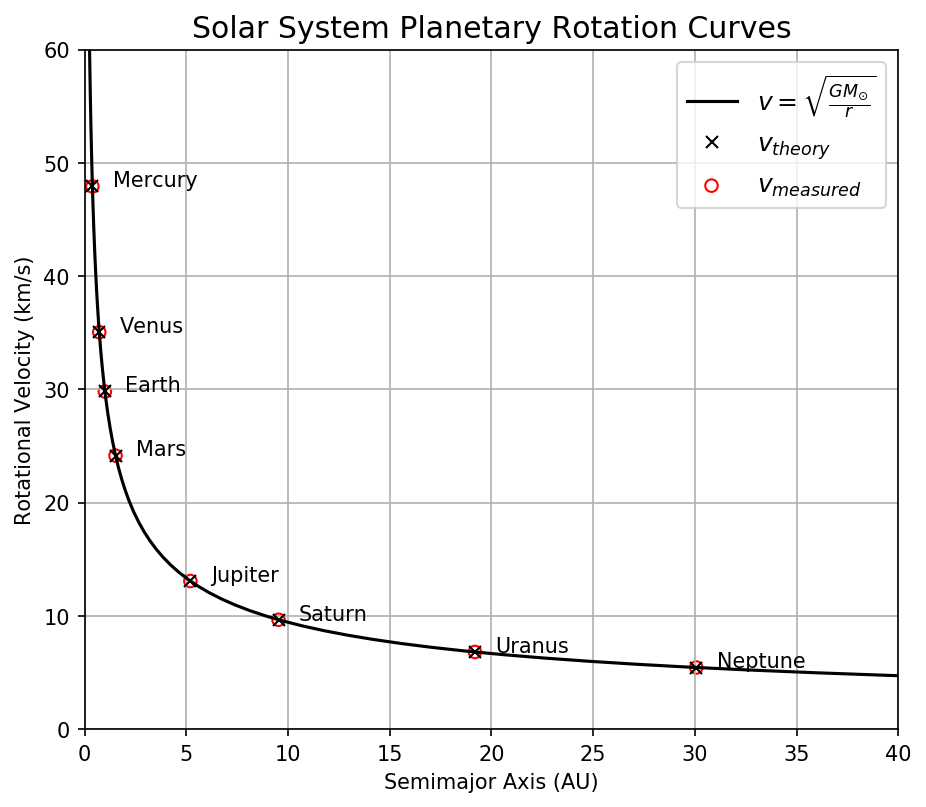

In [3]:
# example plot: visualize the theoretical vs observed rotation curves

r_range = np.logspace(-2,2, 100)
vrot_theory = np.sqrt(4.31e-6 * kpc_over_au / r_range)

fig, ax = plt.subplots(figsize = (7,6), dpi=150)
plt.rcParams['font.size'] = 12
plt.grid(True)
plt.plot(r_range, vrot_theory, 'k-', lw=1.5, label=r'$v=\sqrt{\frac{GM_{\odot}}{r}}$')
plt.plot(a_semi, vrot, 'kx', label=r'$v_{theory}$')
for i in range(len(vrot)):
    plt.annotate(names[i], 
                xy=(a_semi[i]+1, vrot[i]), color='k', fontsize=10)
plt.scatter(a_semi, v_aver, color='none', edgecolor='red', label=r'$v_{measured}$')
plt.xlabel('Semimajor Axis (AU)')
plt.ylabel('Rotational Velocity (km/s)')
plt.xlim(0,40)
plt.ylim(0,60)
plt.title('Solar System Planetary Rotation Curves')
plt.legend()
plt.show()

## Galaxies are rotating, too! 

Same definition for rotation curve (velocity vs distance to center). 

Figure 1. The rotation curve of stars in NGC 2742. Different signs indicate different $\textbf{directions}$ of radial velocities.

<img src="./rotation_curve.png" width="500">

### 3.1 - 3.2 Read from Figure Radii (kpc) and Velocities (km/s)

At either side of the curve (all positive/negative); seven evenly-spaced radii. 

Document your results in a table!

### 3.3 Enclosed Mass Formula

Starting again from force balance: gravity = centripetal

\begin{equation}
F = \frac{G M_{star} M_{enclosed}}{r^{2}} = \frac{M_{star} v^{2}}{r}
\end{equation}

So that
\begin{equation}
M_{enclosed} = \frac{v^{2}r}{G}
\end{equation}

### 3.4 To Weigh a Galaxy, Method I: Gravity 

From $\textbf{3.3}$, the mass of a galaxy at given radii is given by:
\begin{equation}
M_{galaxy, enclosed} = \frac{v^{2}r}{G},
\end{equation}
where $v$ (km/s) and $r$ (kpc) are documented in the first two columns in your table!

Recall useful constants: $M_{\odot} = 1.989 \times 10^{33} g$ and $G = 4.31 \times 10^{-6} km^{2} s^{-2} kpc \cdot M_{\odot}^{-1} = 4.46 \times 10^{-21} cm^{2} s^{-2} AU g^{-1}$.

In [4]:
# from the rotation curve

radii_galactic = np.arange(1, 11, 1) # kpc
vrot_galactic  = np.array([70, 85, 110, 130, 125, 130, 130, 135, 145, 160]) # km/s

menc_galactic  = vrot_galactic**2 * radii_galactic / 4.31e-6 # Msun
print (menc_galactic)

[1.13689095e+09 3.35266821e+09 8.42227378e+09 1.56844548e+10
 1.81264501e+10 2.35266821e+10 2.74477958e+10 3.38283063e+10
 4.39037123e+10 5.93967517e+10]


### 3.5 - 3.6 To Weigh a Galaxy, Method II: Light

If we measure the total light produced by a galaxy; given how much light individual stars produce (roughly $2 M_{\odot}$ for $1 L_{\odot}$), we can determine how many stars are in the galaxy, and, hence, its luminous mass.

[4.0e+08 1.2e+09 2.2e+09 3.5e+09 4.5e+09 5.6e+09 6.8e+09 7.6e+09 8.5e+09
 9.0e+09]


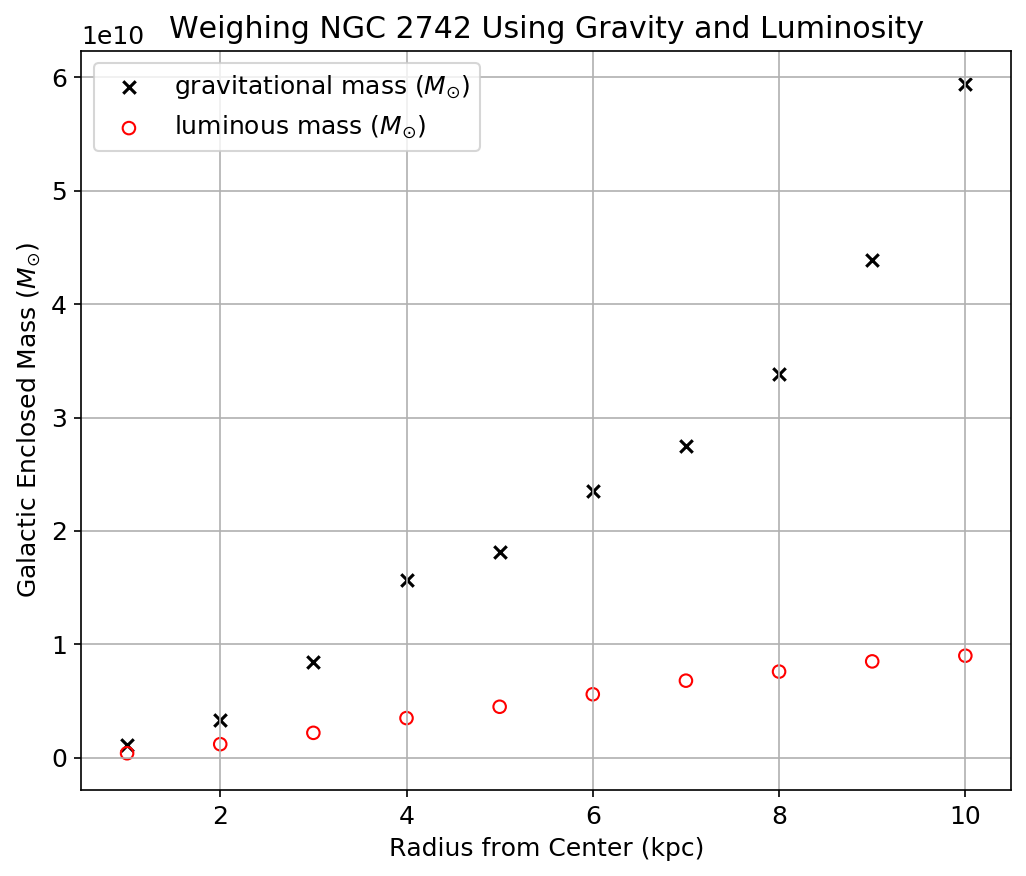

In [5]:
lumi_galactic = np.array([2.0e8, 6.0e8, 1.1e9, 1.75e9, 2.25e9, 2.8e9, 3.4e9, 3.8e9, 4.25e9, 4.5e9])
mlum_galactic = 2.* lumi_galactic

print (mlum_galactic)

fig, ax = plt.subplots(figsize = (7,6), dpi=150)
plt.rcParams['font.size'] = 12
plt.grid(True)
plt.scatter(radii_galactic, menc_galactic, marker = 'x', color='k', label=r'gravitational mass ($M_{\odot}$)')
plt.scatter(radii_galactic, mlum_galactic, color='none',  edgecolor='red', label=r'luminous mass ($M_{\odot}$)')
plt.xlabel('Radius from Center (kpc)')
plt.ylabel(r'Galactic Enclosed Mass ($M_{\odot}$)')
plt.legend()
plt.title('Weighing NGC 2742 Using Gravity and Luminosity')
plt.tight_layout()
plt.show()

### 3.8 Mass-to-light Ratio for NGC 2742?

\begin{equation}
mass-to-light \equiv \frac{M_{grav}}{M_{lumi}},
\end{equation}
calculated at your largest radius (ideally the largest available distance from center, in this case roughly 10 kpc).

In [6]:
# at 10 kpc:

mass_to_light = menc_galactic[-1]/mlum_galactic[-1]
print (mass_to_light)

6.599639082237689


### 3.9 Luminous vs Dark Matter

From the mass-to-light ratio result, what percentage of the galaxy's mass is luminous? What percentage is dark?

## Conclusions

1. Did your data convince you the existence of dark matter? Why or why not?
2. Some galaxies are easier for dark matter studies (such as NGC 2742 in our example), some are not. Why are edge-on and face-on galaxies challenging for dark matter studies? (Hint: read the paragraphs before 3.5)
3. Questions, comments, feedback are welcome!
